
## Anjumanara Athina 155142

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv('assignment1_dataset.csv', sep=',')# write data into df

In [27]:
print(df) #check the values in dataframe

           f1        f2        f3        f4        f5   response
0   -0.764216 -1.016209  0.149410 -0.050119 -0.578127   6.242514
1    0.763880 -1.159509 -0.721492 -0.654067 -0.431670  -8.118241
2    0.519329 -0.664621 -1.694904  1.339779  0.182764  66.722455
3   -0.177388  0.515623  0.135144 -0.647634 -0.405631 -27.716793
4    0.104022  0.749665 -0.939338 -0.090725 -0.639963   8.192075
..        ...       ...       ...       ...       ...        ...
995 -0.310133  0.529274 -1.439255  0.724974  0.430063  35.181828
996 -0.731895 -0.223302 -1.228191 -2.034934  0.509077 -70.134876
997  0.343181  0.431241 -0.054715  0.945423 -2.474684  42.925478
998  0.391021  0.494147  0.106403 -0.652278 -0.200139 -13.287862
999 -0.376168 -0.054266 -0.880176 -0.334246 -0.043447  -6.829767

[1000 rows x 6 columns]


In [28]:
X = df[['f1','f2','f3','f4','f5']]#splitting response and 
y = df['response']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.2)#to split the dataframe to 8:2


# Training_model function

In [30]:
def training_model(X,y,alpha,max_epoch):
    x1 = X_train['f1'].values#seperating each column to be calculated at respective weights
    x2 = X_train['f2'].values
    x3 = X_train['f3'].values
    x4 = X_train['f4'].values
    x5 = X_train['f5'].values
    x= X_train.values 
    y = y_train.values #training set for responses
    w1 = w2 = w3 = w4 = w5 = w0 = 0 
    n = len(X) #determine size, in 8:2 case, it is 800
    lostarr = [1]*(max_epoch)
    
    for i in range(max_epoch):
        y_predict= w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w0 
        w1 = w1 - alpha * -(2/n)*sum(x1*(y-y_predict)) # wᵢ = wᵢ - learning rate * derivate of wᵢ
        w2 = w2 - alpha * -(2/n)*sum(x2*(y-y_predict))
        w3 = w3 - alpha * -(2/n)*sum(x3*(y-y_predict))
        w4 = w4 - alpha * -(2/n)*sum(x4*(y-y_predict))
        w5 = w5 - alpha * -(2/n)*sum(x5*(y-y_predict))
        w0 = w0 - alpha * -(2/n)*sum(y-y_predict) #intercept formula
        hist_loss = (1/n) * sum((y-y_predict)**2) #loss formula
        print("Estimated weight: w1=",w1," ,w2=",w2,"w3=",w3," ,w4=",w4,"w5=",w5," ,w0=",w0,"loss: ",hist_loss," epoch:",i,"\n")
        lostarr[i] = hist_loss
        
    return [w1,w2,w3,w4,w5,w0],lostarr #returning the estimated weights and training history


## Display training loss value for each epoch of the training loop

In [31]:
alpha = 0.1 #learning rate
max_epoch = 100 #number of iterations
arrw, traininglossarr = training_model(X_train, y_train, alpha, max_epoch) 
#array that stores the estimated weights and training loss history


Estimated weight: w1= 2.6340516363092426  ,w2= -0.10601937886971623 w3= 0.06737080671764528  ,w4= 8.162117084994529 w5= -0.3298404018399491  ,w0= 2.000821978012665 loss:  1778.8647206639191  epoch: 0 

Estimated weight: w1= 4.676849513322379  ,w2= -0.17253626901358238 w3= 0.11171309188106379  ,w4= 14.51221978590873 w5= -0.5114860683491284  ,w0= 3.5820212203785813 loss:  1088.2096501036426  epoch: 1 

Estimated weight: w1= 6.261871317215669  ,w2= -0.21162283312101504 w3= 0.13988126834793563  ,w4= 19.453140939146515 w5= -0.5936655626580672  ,w0= 4.831432928704183 loss:  669.9897216263597  epoch: 2 

Estimated weight: w1= 7.492319084954861  ,w2= -0.23198902713040515 w3= 0.15682847245589526  ,w4= 23.298036472376694 w5= -0.6109330897470919  ,w0= 5.8185443996878154 loss:  416.5961538862743  epoch: 3 

Estimated weight: w1= 8.448012672610268  ,w2= -0.2398697404062121 w3= 0.1661120095478884  ,w4= 26.290375520124538 w5= -0.5875299829620039  ,w0= 6.598319256553609 loss:  262.9790884546163  epoch

## Display the estimated weights (after model training)

In [32]:
print("Estimated weights w1={}, w2={}, w3={}, w4={}, w5={}, w0={}".format(arrw[0],arrw[1],arrw[2],arrw[3],arrw[4],arrw[5]))

Estimated weights w1=11.81487844403193, w2=-0.13040765122694598, w3=0.13302926472899101, w4=36.81784298320661, w5=0.1206287852362057, w0=9.522493629457088


# Prediction function

In [35]:
def prediction(w,X):
    x1 = X['f1'].values
    x2 = X['f2'].values
    x3 = X['f3'].values
    x4 = X['f4'].values
    x5 = X['f5'].values
    w1=w[0] #assign estimated weights
    w2=w[1] 
    w3=w[2] 
    w4=w[3] 
    w5=w[4]
    w0=w[5]
    n= len(X)
    y_predicted = np.array(n)
    for i in range(n):
        y_predicted = w1*x1+w2*x2+w3*x3+w4*x4+w5*x5+w0 #predicting values
    
    return y_predicted
    
    

In [36]:
yhat = np.array(prediction(arrw,X_test))
#storing y_predicted into yhat

# Loss function

In [37]:
def lossfn(y,yhat):#using mean squared error formula
    n = len(y)
    y_actual = y.values
    temp_loss_val=0
    for i in range(n):
        temp_loss_val+= (y_actual[i]-yhat[i])**2
    
    return (1/n)*temp_loss_val

In [38]:
loss_value = lossfn(y_test,yhat)
#store loss value

In [39]:
epocharr = [1]*max_epoch #making array to plot the graph in x-axis
for i in range(max_epoch):
    epocharr[i] =i

## Display the training loss against epoch graph (after model training)

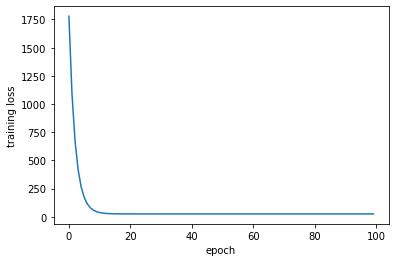

In [40]:
#plotiing graph using array
x = epocharr
y = traininglossarr


plt.xlabel('epoch')
plt.ylabel('training loss')
plt.plot(x, y,)


plt.show()

# R^2 function

In [41]:
def r_squared(y_test,y_hat):#r^2 formula
    n = len(y_hat)
    y_test_mean = np.mean(y_test)
    
    RSS = sum((y_test-yhat)**2)
    TSS = sum((y_test-y_test_mean)**2)
    
    return (1 - (RSS/TSS))


## Evaluation and Display both R-squared & mean squared error measures

In [42]:
r_squared_val = r_squared(y_test,yhat)
print("R^2 value: ",r_squared_val," Mean Squared Error(MSE): ",loss_value)

R^2 value:  0.9817879703745107  Mean Squared Error(MSE):  22.912724210198718


### With a high training loss(>20), it is assumed that the estimated weights and prediction will be wrong. But suprisingly it predicted values quite close or far with range of (0.01 to 10). When compared to using skcit GD to sort, skcit GD has low training loss and more accurate prediction

### since R^2 is close to 1, it is a good fit, MSE is above 20 while a perfect fit is 0.0 